<a href="https://colab.research.google.com/github/LaraN01/DrugData_AdverseEvents/blob/main/Notebook_3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions
import matplotlib.colors as mcolors
import itertools

# 2. Load the data

In [ ]:
dataset_path='datasets/final_dataset.csv'
data=pd.read_csv(dataset_path,index_col=0, dtype={
    'UNII Codes for Inactive Ingredients':'O',
    'UNII Codes for Active Ingredients':'O',
    'Routes of Administration':'O',
    'Product Types':'O',
    'charge':'f4',
    'count':'f4',
    'stereochemistry':'O',
    'defined_stereo':'f4',
    'ez_centers':'f4',
    'molecular_weight':'f4',
    'optical_activity':'O',
    'stereo_centers':'f4',
    'patientsex':'O',
    'risk score':'f4'} )

dailymed=pd.read_csv('datasets/original/scraped_dailymed.csv')

# 3. Data shape and head

In [ ]:
data.head(3)

,UNII Codes for Inactive Ingredients,UNII Codes for Active Ingredients,Routes of Administration,Product Types,charge,count,stereochemistry,defined_stereo,ez_centers,molecular_weight,optical_activity,stereo_centers,patientsex,risk score
14,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",L6UH7ZF8HC,ORAL,HUMAN PRESCRIPTION DRUG,0.0,1.0,ACHIRAL,0.0,0.0,410.485413,NONE,0.0,male,7.0
15,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",L6UH7ZF8HC,ORAL,HUMAN PRESCRIPTION DRUG,0.0,1.0,ACHIRAL,0.0,0.0,410.485413,NONE,0.0,male,7.0
16,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",L6UH7ZF8HC,ORAL,HUMAN PRESCRIPTION DRUG,0.0,1.0,ACHIRAL,0.0,0.0,410.485413,NONE,0.0,male,7.0


In [ ]:
print('Shape of the dataset is ', data.shape)

Shape of the dataset is  (8859085, 14)


In [ ]:
dailymed=dailymed.dropna()
print('Dailymed dataset shape after dropping nan values', dailymed.shape)
unii_dict=functions.list_zipper(dailymed,'UNII Codes for Inactive Ingredients','Inactive Ingredient Names')
print('UNII codes zipped with corresponding names')

Dailymed dataset shape after dropping nan values (18753, 8)
UNII codes zipped with corresponding names


In [ ]:
N = 5
out = dict(itertools.islice(unii_dict.items(), N))
print('Example of zipped excipient name with the corresponding UNII code')
out

Example of zipped excipient name with the corresponding UNII code


{'KEH0A3F75J': 'HEXYLENE GLYCOL',
 ' E4GA8884NN': ' PHOSPHORIC ACID',
 ' F76354LMGR': ' PROPYLENE GLYCOL MONOPALMITOSTEARATE',
 ' 2KR89I4H1Y': ' STEARYL ALCOHOL',
 ' YRC528SWUY': ' POLYOXYL 20 CETOSTEARYL ETHER'}

# 4. Visualizations

## 4.1 Environmental properties: Route of administration

In [ ]:
list_routes=data['Routes of Administration'].unique()

dict_counts={}
for item in list_routes:
    key=item
    value=len(data[data['Routes of Administration']==item])
    dict_counts.update({key:value})

# dict_counts

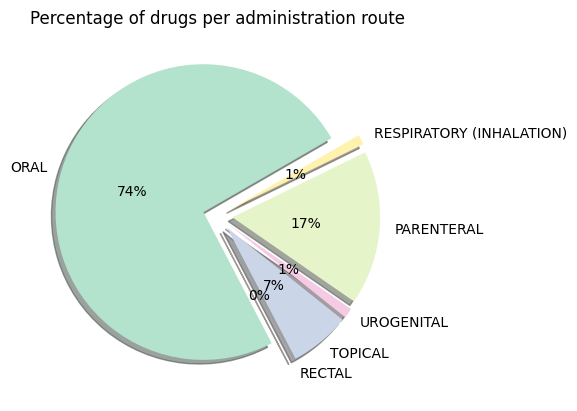

In [ ]:
# Reorder for a better visualization
dict_counts={'ORAL': 6583092,
             'RECTAL': 1994,
             'TOPICAL': 586958,
             'UROGENITAL': 96050,
             'PARENTERAL': 1494504,
             'RESPIRATORY (INHALATION)': 96487,}

explode=(0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(dict_counts.values(),
        labels=dict_counts.keys(),
        colors=plt.cm.Pastel2.colors,
        explode=explode,
        autopct='%1.0f%%',
        shadow=True,
        startangle=30,
        pctdistance=0.5,
        labeldistance=1.1)
plt.title('Percentage of drugs per administration route')
plt.show()

The majority of the dataset (74%) comprises medicines for oral administration.  
Pharmaceutical for oral administration, including, among others, pills, capsules and granulates, are the most common type of pharmaceutical and often represent over-the-counter drugs (OTC). OTC do not require a medical prescription and can be sold by pharmacies over pharmacist advice or by patient request representing a category of pharmaceutical largely used.

FDA Adverse event dataset is a collection of averse events reported from clinics, pharmacists but also from patients. The greatest prevalence of oral drugs can be therefore explained by their larger use compared with other type of administrations.

## 4.2 Environmental properties: Patients

In [ ]:
list_people=data['patientsex'].unique()
people_counts={}
for item in list_people:
    key=item
    value=len(data[data['patientsex']==item])
    people_counts.update({key:value})

# people_counts

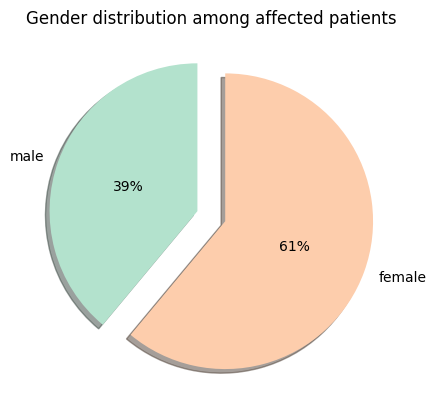

In [ ]:
explode=(0.1,0.1)
plt.pie(people_counts.values(),
        labels=people_counts.keys(),
        colors=plt.cm.Pastel2.colors,
        explode=explode,
        autopct='%1.0f%%',
        shadow=True,
        startangle=90,
        pctdistance=0.5,
        labeldistance=1.1)
plt.title('Gender distribution among affected patients')
plt.show()

The majority of the patients who experienced adverse event in the datasets were female.

## 4.3 Drug properties: Stereochemistry

In [ ]:
list_stereo=data['stereochemistry'].unique()
stereo_counts={}
for item in list_stereo:
    key=item
    value=len(data[data['stereochemistry']==item])
    stereo_counts.update({key:value})

list_optic=data['optical_activity'].unique()
optic_counts={}
for item in list_optic:
    key=item
    value=len(data[data['optical_activity']==item])
    optic_counts.update({key:value})

# stereo_counts
# optic_counts

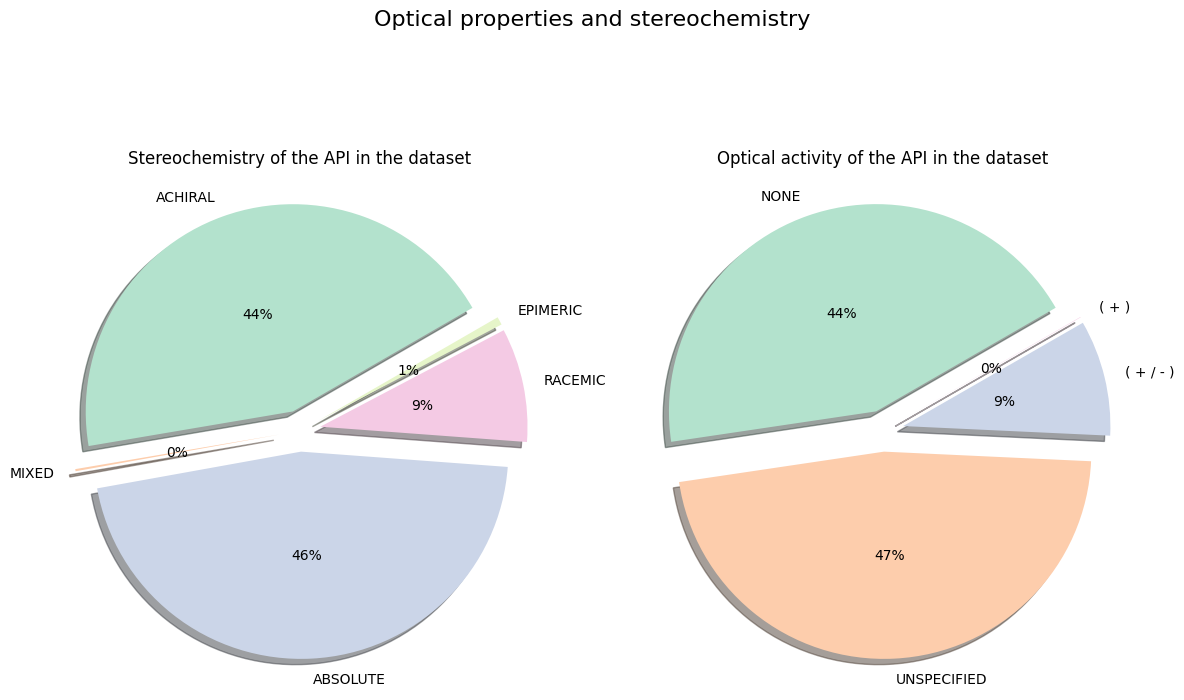

In [ ]:
# reorder for better visualization
stereo_counts={'ACHIRAL': 3927962,
               'MIXED': 14695,
               'ABSOLUTE': 4073917,
               'RACEMIC': 787046,
               'EPIMERIC': 55465}

explode_stereo = (0.1, 0.1, 0.1, 0.1, 0.1)
explode_optic = (0.1, 0.1, 0.1, 0.1)

fig, axs = plt.subplots(1, 2, figsize=(12, 8))

axs[0].pie(stereo_counts.values(),
           labels=stereo_counts.keys(),
           colors=plt.cm.Pastel2.colors,
           explode=explode_stereo,
           autopct='%1.0f%%',
           shadow=True,
           startangle=30,
           pctdistance=0.5,
           labeldistance=1.1)
axs[0].set_title('Stereochemistry of the API in the dataset')

axs[1].pie(optic_counts.values(),
           labels=optic_counts.keys(),
           colors=plt.cm.Pastel2.colors,
           explode=explode_optic,
           autopct='%1.0f%%',
           shadow=True,
           startangle=30,
           pctdistance=0.5,
           labeldistance=1.1)
axs[1].set_title('Optical activity of the API in the dataset')

fig.suptitle('Optical properties and stereochemistry', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Stereochemistry and optical activity shows a similar distribution. Achiral molecules have no optical activity (green slice) as without any stereocenter.

Racemic mixtures are mixtures of equal quantities of two enantiomers. Each enantiomer rotates the plane of polarization of plane-polarized light through a characteristic angle, but, because the rotatory effect of each component exactly cancels that of the other, the racemic mixture is optically inactive (9%).  

An epimeric drug represent instead the presence of only one of the two enantiomers, (+) enantiomer in the dataset.   

Absolute indicate molecules with stereocenters, without specifying though, if only one of the enantiomers is present or a mixture of the two (racemate) and the optical activities of these molecules in unspecified.

Due to the big lack of data (the unspecified portion is approximately 50% of the data), despite the enantiomeric properties plays an important role in the risk of a molecule, famous is the case of Talidomide in the risk of one of the enantiomeric configutaions, it will be removed from the final dataset.

## 4.4 Drug properties: molecular weight

In [ ]:
drugs = data.groupby('UNII Codes for Active Ingredients', as_index=False).agg({
    'risk score': 'mean',
    'UNII Codes for Inactive Ingredients': 'first',
    'charge': 'first',
    'count': 'first',
    'stereochemistry': 'first',
    'ez_centers': 'first',
    'molecular_weight': 'first',
    'optical_activity': 'first',
    'stereo_centers': 'first'})

drugs['risk_cat']=pd.cut(drugs['risk score'],
                         bins=[0,3,6,7,8,9,10,13,np.inf],
                         labels=[3,6,7,8,9,10,13,14])   # 3 is all <=3, 6 is 4-6, 13 is 11-13, 14 is >=14

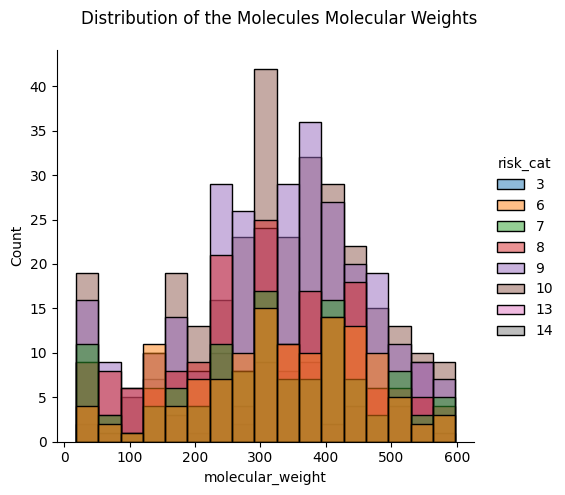

In [ ]:
filtered_data = drugs[drugs['molecular_weight'] < 600]
plot = sns.displot(filtered_data, x="molecular_weight", hue="risk_cat")
plot.figure.suptitle('Distribution of the Molecules Molecular Weights')
plot.figure.subplots_adjust(top=0.9)

The molecular weights of the molecules range from 0 to about 600. The distribution is bimodal, with notable peaks around 100 and 300-400.

The highest concentration of molecules is around the molecular weight of 300, where the total count exceeds 40.Another significant peak is around 100 molecular weight, with counts around 20.

**Risk category 9 (purple)** and **Risk category 10 (brown)** are the most prevalent across most molecular weight ranges. **Risk category 8 (red)** and **Risk category 14 (gray)** are also prominent, particularly in the 200-500 molecular weight range. **Risk category 3 (blue)** and **Risk category 6 (orange)** appear less frequently compared to others. **Risk category 7 (green)** and **Risk category 13 (pink)** have the lowest counts overall but are present in various molecular weight ranges.

Molecules with lower molecular weights (under 100) tend to have a higher proportion of risk categories 9 and 10. Molecules in the mid-range (200-400) show a mix of risk categories, with categories 8, 9, 10, and 14 being significant.Higher molecular weights (above 400) still have contributions from multiple risk categories but with a noticeable presence of category 10.

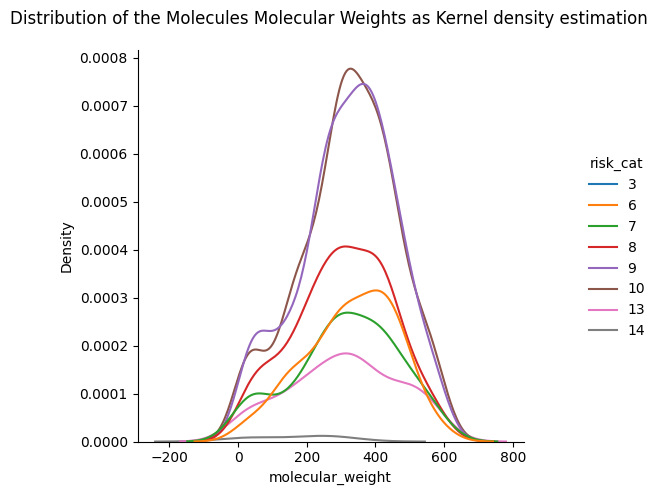

In [ ]:
plot=sns.displot(filtered_data, x="molecular_weight", hue="risk_cat",  kind="kde")
plot.figure.suptitle('Distribution of the Molecules Molecular Weights as Kernel density estimation')
plot.figure.subplots_adjust(top=0.9)

KDE plots provide a smoothed estimate of the probability density function of a random variable, offering a continuous view of the distribution.  

**Risk category 9 (purple)** and **Risk category 10 (brown)** have the highest peak densities, indicating a higher concentration of molecules around 300-400 molecular weight. **Risk category 8 (red)** also shows a prominent peak but slightly lower compared to categories 9 and 10.**Risk categories 6 (orange) and 13 (pink)** have moderate densities with peaks around 200-300 molecular weight.**Risk category 7 (green)** has a relatively lower peak compared to the other categories but shows a broader distribution.**Risk categories 3 (blue) and 14 (gray)** have the lowest densities, indicating fewer molecules in these categories across the molecular weight range.

For most risk categories, the density increases rapidly up to around 300 molecular weight and then decreases more gradually. Categories 9 and 10 dominate the density in the range of 200-400, suggesting a high number of molecules in this range belong to these risk categories. Lower molecular weights (<200) and higher molecular weights (>400) have lower densities across all risk categories.

The KDE plot confirms the bimodal distribution observed in the histogram, with significant peaks around 100 and 300-400 molecular weight. The KDE plot provides a clearer, smoother view of the distribution, highlighting the dominant presence of certain risk categories in specific molecular weight ranges.

## 4.5 Drug properties: formulation

In [ ]:
data_slice=data.loc[:,['UNII Codes for Inactive Ingredients','UNII Codes for Active Ingredients']]
data_grouped=data_slice.groupby('UNII Codes for Active Ingredients', as_index=False).agg({
    'UNII Codes for Inactive Ingredients':functions.split_and_merge})

all_inactives, unique_inactives=functions.get_unique(data_grouped,'UNII Codes for Inactive Ingredients')

c:\Users\lnonis\OneDrive - Lonza AG\Desktop\WIP\VSCode\Final_project\functions.py:204: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_values=pd.unique(all_values)
c:\Users\lnonis\OneDrive - Lonza AG\Desktop\WIP\VSCode\Final_project\functions.py:221: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  list_of_unique_ingredients=pd.unique(all_ingredients)


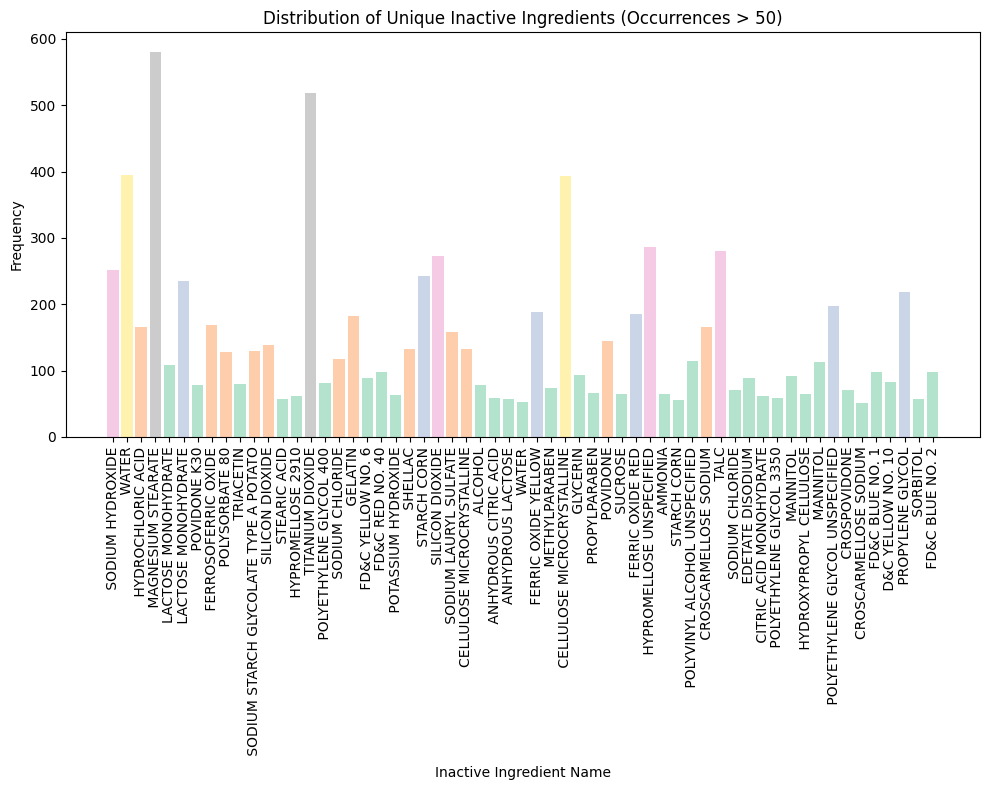

In [ ]:
count_inactives = functions.count_unique_values(all_inactives)

def plot_distribution(counter, threshold=50, unii_dict=None):
    filtered_items = {key: value for key, value in counter.items() if value > threshold}
    if not filtered_items:
        print(f"No items with occurrences greater than {threshold}")
        return
    
    if unii_dict:
        labels = [unii_dict.get(key, key) for key in filtered_items.keys()]
    else:
        labels = list(filtered_items.keys())

    values = list(filtered_items.values())

    plt.figure(figsize=(10, 8))
    norm = mcolors.Normalize(min(values), max(values))
    colors = plt.cm.Pastel2(norm(values))
    plt.bar(labels, values, color=colors)
    plt.xlabel('Inactive Ingredient Name')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Unique Inactive Ingredients (Occurrences > {threshold})')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_distribution(count_inactives, threshold=50, unii_dict=unii_dict)

The most represented inactive ingredients are titanium dioxide and magnesium stearate. Magnesium stearate is a lubricant, widely used to prevent sticking of the capsules to each other and to the machine that creates them. Titanium dioxide is a coating agent often used in capsules and tablets to make opaque films, it produce pastel shades as a result of its whiteness, and maintain excellent light/heat stability.  

Widely represented in the dataset are also Water, important component of several dosage forms,  and cellulose microcristalline, the most widely used excipient for direct compression serving as a strong dry binder, tablet disintegrant, an absorbent, filler or diluent, a lubricant, and anti-adherent.

In accordance with the distribution of the route of administration of the drugs in the dataset, all the excipient mostly represented in the dataset are from oral dosage forms.